## Team Members
- Sai Bhargav Tetali
- Soumith Reddy Palreddy
- Srividya Rayaprolu
- Shubhada Kapre
- Akhila Guttikonda

In [33]:
import os, csv, nltk, lda
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('wordnet')


In [2]:
# importing all the excel files and combining the data
import os
import glob
  
# use glob to get all the xlsx files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.xlsx"))

df = pd.DataFrame(columns = ['Company','Pros', 'Cons'])

for f in csv_files:
    #read the csv file
    if f.count('_') == 1:
        df_temp = pd.read_excel(f,  nrows=500)
        df_temp = df_temp[['Pros','Cons']]
        df_temp['Company'] = f.split("/")[-1].split("_")[0]
        df = pd.concat([df,df_temp])
        print(f.split("/")[-1].split("_")[0])

print(len(df))

Netflix
Bank of America
EY
Target
PWC
Spotify
Apple
Deloitte
KPMG
Google
J P Morgan Chase
Amazon
Meta
P&G
Goldman Sachs
Walmart
BCG
Mc Kinsey
Loreal
Bain and Company
10000


In [3]:

#droppping null rows if any
df = df.dropna()
df.reset_index(drop = True, inplace = True)
company_name = 'Company'
company_review_pros = 'Pros'
company_review_cons = 'Cons'
#determining the number of topics. This number has been decided after running the code multiple times and checking
# the ouput
ntopics= 3

# data preprocessing - lemmatization, stopwords removal
word_tokenizer = RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))

In [4]:
def tokenize_text(version_desc):
    # converting the all the text to lowercase
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

In [5]:
# Countvectorizer for the pros column
vec_words_pros = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
# Countvectorizer for the cons column
vec_words_cons = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')

total_features_words_pros = vec_words_pros.fit_transform(df[company_review_pros])
total_features_words_cons = vec_words_cons.fit_transform(df[company_review_cons])

print(total_features_words_pros.shape)
print(total_features_words_cons.shape)

/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


(9999, 6593)
(9999, 9605)


In [6]:
# assigning LDA function to a variable
model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
# fitting the model on words in pros column 
model.fit(total_features_words_pros)

topic_word_pros = model.topic_word_
doc_topic_pros = model.doc_topic_
doc_topic_pros = pd.DataFrame(doc_topic_pros)
df = df.join(doc_topic_pros)

# assigning LDA function to a variable
model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
# fitting the model on words in cons column
model.fit(total_features_words_cons)

topic_word_cons = model.topic_word_
doc_topic_cons = model.doc_topic_
doc_topic_cons = pd.DataFrame(doc_topic_cons)
df = df.join(doc_topic_cons, lsuffix = '_pros', rsuffix = '_cons')
# the result will give the proportion of each of the topics in each pros and cons reviews
df

INFO:lda:n_documents: 9999
INFO:lda:vocab_size: 6593
INFO:lda:n_words: 98845
INFO:lda:n_topics: 3
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -849471
INFO:lda:<10> log likelihood: -738180
INFO:lda:<20> log likelihood: -728621
INFO:lda:<30> log likelihood: -719874
INFO:lda:<40> log likelihood: -712358
INFO:lda:<50> log likelihood: -707223
INFO:lda:<60> log likelihood: -703956
INFO:lda:<70> log likelihood: -702323
INFO:lda:<80> log likelihood: -701558
INFO:lda:<90> log likelihood: -700493
INFO:lda:<100> log likelihood: -700481
INFO:lda:<110> log likelihood: -699924
INFO:lda:<120> log likelihood: -699589
INFO:lda:<130> log likelihood: -699078
INFO:lda:<140> log likelihood: -699522
INFO:lda:<150> log likelihood: -699590
INFO:lda:<160> log likelihood: -699135
INFO:lda:<170> log likelihood: -699048
INFO:lda:<180> log likelihood: -699041
INFO:lda:<190> log likelihood: -699315
INFO:lda:<200> log likelihood: -699368
INFO:lda:<210> log likelihood: -699117
INFO:lda:<220> log likelihood: -69

,Company,Pros,Cons,0_pros,1_pros,2_pros,0_cons,1_cons,2_cons
0,Netflix,"Very competitive pay, and competent teams to g...","A lot of turnover, constant corporate level ch...",0.962264,0.018868,0.018868,0.968254,0.015873,0.015873
1,Netflix,- Paycheck\n- So many good people\n- Such a gr...,I have been working for a year at Netflix.\n\n...,0.561644,0.287671,0.150685,0.211033,0.000260,0.788707
2,Netflix,Big name\nAll cash comp (for now),Cost cutting environment\nManagement lacks vis...,0.953488,0.023256,0.023256,0.980583,0.009709,0.009709
3,Netflix,Netflix has been a wild and wonderful ride. Th...,"It is not for everyone. If you need stability,...",0.206107,0.002545,0.791349,0.549488,0.139932,0.310580
4,Netflix,The pay when all engineers were senior enginee...,There is a great deal of politics between Engi...,0.071895,0.267974,0.660131,0.675520,0.000718,0.323762
...,...,...,...,...,...,...,...,...,...
9994,Bain and Company,Huge focus on professional development. Teams...,Hours can obviously be long but this is often ...,0.689320,0.009709,0.300971,0.252033,0.414634,0.333333
9995,Bain and Company,"Really smart people, fulfilling work, will alw...","Not a lot, sometimes the work can get overwhel...",0.373494,0.012048,0.614458,0.015873,0.968254,0.015873
9996,Bain and Company,"High impact work, smart and humble coworkers.",Long hours. Work can be stressful at times whe...,0.809524,0.174603,0.015873,0.015873,0.968254,0.015873
9997,Bain and Company,"Great company culture, great mentorship and le...",Highly variable experience based on your proje...,0.972603,0.013699,0.013699,0.015873,0.809524,0.174603


In [7]:
# creating a dataframe to store company wise topics distribution
company = pd.DataFrame()
for i in range(int(ntopics)):
    topic="pros_topic_" + str(i)
    column = str(i)+'_pros'
    company[topic]=df.groupby([company_name])[column].mean()
for i in range(int(ntopics)):    
    topic="cons_topic_" + str(i)
    column = str(i)+'_cons'
    company[topic]=df.groupby([company_name])[column].mean()

company = company.reset_index()

# exporting the words in pros column with the probability distributions in each of the topics
topics = pd.DataFrame(topic_word_pros)
topics.columns=vec_words_pros.get_feature_names()
topics1 = topics.transpose()
print ("Topics word distribution written in file pros_topic_word_dist.xlsx ")
topics1.to_excel("pros_topic_word_dist.xlsx")

# exporting the words in cons column with the probability distributions in each of the topics
topics = pd.DataFrame(topic_word_cons)
topics.columns=vec_words_cons.get_feature_names()
topics1 = topics.transpose()
print ("Topics word distribution written in file cons_topic_word_dist.xlsx ")
topics1.to_excel("cons_topic_word_dist.xlsx")


# exporting the company wise topics distribution. The export format can be viewed below.
company.to_excel("document_pros_topic_dist.xlsx",index=False)
print ("Document topic distribution written in file document_pros_topic_dist.xlsx ")

/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topics word distribution written in file pros_topic_word_dist.xlsx 


/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topics word distribution written in file cons_topic_word_dist.xlsx 
Document topic distribution written in file document_pros_topic_dist.xlsx 


In [8]:
company # company topics distribution. Here topics are not yet known to us. We will detrmine the tpics by looking 
# at the word probability distributions we exported in the above for pros and cons.

,Company,pros_topic_0,pros_topic_1,pros_topic_2,cons_topic_0,cons_topic_1,cons_topic_2
0,Amazon,0.246579,0.319006,0.434415,0.337707,0.245711,0.416582
1,Apple,0.268632,0.477389,0.253980,0.289903,0.340494,0.369603
2,BCG,0.578254,0.208276,0.213470,0.253003,0.544966,0.202031
3,Bain and Company,0.614222,0.085792,0.299986,0.237366,0.545280,0.217354
4,Bank of America,0.301210,0.463573,0.235216,0.398997,0.251279,0.349723
5,Deloitte,0.490967,0.284709,0.224324,0.391564,0.396323,0.212113
6,EY,0.498335,0.263119,0.238546,0.315437,0.472396,0.212167
7,Goldman Sachs,0.484829,0.279999,0.235172,0.354234,0.414158,0.231608
8,Google,0.358361,0.389952,0.251687,0.404467,0.217689,0.377845
9,J P Morgan Chase,0.333619,0.391246,0.275135,0.479311,0.226352,0.294337


In [24]:
# calculating Euclidean distances between companies by taking the topic proportions as vector elements. Each company
# vector will have 6 elements - 3 pros and 3 cons
def Euclidean_d(x,l):
    d_list = []
    for i in l:
        d_list.append(np.sqrt((np.square(company_dict[i] - company_dict[x])).sum()))
        
    return d_list
    
        
company_dict = {}
company_list = company['Company'].to_list()
company_vectors = company[['pros_topic_0','pros_topic_1','pros_topic_2','cons_topic_0','cons_topic_1','cons_topic_2']].to_numpy()
for i in range(len(company_list)):
    company_dict[company_list[i]] = company_vectors[i]

distance_dict = {}
for i in company_list:
    distance_dict[i] = Euclidean_d(i,company_list)
    
mds_df = pd.DataFrame(distance_dict)
mds_df

,Amazon,Apple,BCG,Bain and Company,Bank of America,Deloitte,EY,Goldman Sachs,Google,J P Morgan Chase,KPMG,Loreal,Mc Kinsey,Meta,Netflix,P&G,PWC,Spotify,Target,Walmart
0,0.000000,0.267590,0.560219,0.589171,0.267996,0.415249,0.445574,0.401055,0.240126,0.271174,0.439001,0.214475,0.566406,0.269601,0.092269,0.278424,0.446242,0.320076,0.417127,0.396429
1,0.267590,0.000000,0.491100,0.585470,0.147853,0.354531,0.376496,0.338623,0.209704,0.258187,0.371252,0.294848,0.526208,0.320940,0.306926,0.260895,0.368309,0.390262,0.179565,0.233325
2,0.560219,0.491100,0.000000,0.155758,0.521327,0.234466,0.138891,0.206340,0.493742,0.508308,0.140414,0.454703,0.064971,0.461825,0.610584,0.418018,0.142069,0.565527,0.590657,0.697814
3,0.589171,0.585470,0.155758,0.000000,0.612350,0.326309,0.245120,0.299523,0.566839,0.582097,0.241744,0.497371,0.103624,0.509862,0.636209,0.489291,0.245871,0.612245,0.701223,0.790538
4,0.267996,0.147853,0.521327,0.612350,0.000000,0.328858,0.392234,0.331512,0.104435,0.134217,0.398203,0.217104,0.546807,0.223407,0.288765,0.171651,0.411656,0.264071,0.294679,0.328283
5,0.415249,0.354531,0.234466,0.326309,0.328858,0.000000,0.110928,0.047636,0.298249,0.286427,0.137755,0.256370,0.246346,0.255495,0.461985,0.199542,0.178611,0.343623,0.489486,0.586137
6,0.445574,0.376496,0.138891,0.245120,0.392234,0.110928,0.000000,0.075852,0.368921,0.372868,0.035107,0.328969,0.163697,0.340678,0.499759,0.286219,0.076638,0.440139,0.493112,0.597873
7,0.401055,0.338623,0.206340,0.299523,0.331512,0.047636,0.075852,0.000000,0.301439,0.302800,0.099881,0.262666,0.222406,0.268610,0.449776,0.213639,0.138792,0.366987,0.472212,0.567757
8,0.240126,0.209704,0.493742,0.566839,0.104435,0.298249,0.368921,0.301439,0.000000,0.117533,0.379259,0.144551,0.509075,0.135437,0.244328,0.120902,0.399324,0.201736,0.379229,0.397592
9,0.271174,0.258187,0.508308,0.582097,0.134217,0.286427,0.372868,0.302800,0.117533,0.000000,0.383556,0.133974,0.520585,0.136901,0.296891,0.097284,0.408525,0.145541,0.412064,0.452943


In [26]:
a = mds_df.to_numpy()
a

array([[0.        , 0.26759034, 0.5602193 , 0.5891712 , 0.26799634,
        0.41524872, 0.44557401, 0.40105504, 0.24012633, 0.27117382,
        0.43900089, 0.2144752 , 0.56640603, 0.26960105, 0.092269  ,
        0.27842439, 0.44624218, 0.32007625, 0.41712692, 0.39642875],
       [0.26759034, 0.        , 0.49109968, 0.58546964, 0.14785278,
        0.35453129, 0.37649609, 0.33862291, 0.20970435, 0.2581865 ,
        0.37125165, 0.29484824, 0.52620803, 0.32093978, 0.30692631,
        0.26089539, 0.36830882, 0.39026206, 0.17956463, 0.23332514],
       [0.5602193 , 0.49109968, 0.        , 0.15575806, 0.5213268 ,
        0.23446588, 0.13889053, 0.20634016, 0.49374179, 0.50830782,
        0.14041419, 0.45470346, 0.06497089, 0.46182486, 0.61058438,
        0.41801845, 0.1420688 , 0.56552701, 0.59065731, 0.69781391],
       [0.5891712 , 0.58546964, 0.15575806, 0.        , 0.61235049,
        0.32630875, 0.2451197 , 0.29952251, 0.56683902, 0.58209684,
        0.2417443 , 0.49737097, 0.10362399, 0

In [27]:
from sklearn.manifold import MDS
X_scaled = (a - np.min(a))/np.ptp(a)
X_scaled

array([[0.        , 0.3384913 , 0.70865547, 0.7452785 , 0.33900487,
        0.52527337, 0.56363368, 0.50731892, 0.3037504 , 0.34302427,
        0.55531893, 0.27130273, 0.71648145, 0.34103477, 0.11671668,
        0.35219595, 0.56447888, 0.40488393, 0.52764922, 0.50146684],
       [0.3384913 , 0.        , 0.62122187, 0.74059617, 0.18702798,
        0.4484682 , 0.47625281, 0.42834473, 0.26526779, 0.32659582,
        0.46961879, 0.37297148, 0.66563255, 0.40597626, 0.38824976,
        0.33002245, 0.46589624, 0.49366622, 0.22714223, 0.29514717],
       [0.70865547, 0.62122187, 0.        , 0.19702784, 0.65945799,
        0.29659016, 0.17569109, 0.26101222, 0.62456403, 0.64298949,
        0.17761845, 0.57518207, 0.08218563, 0.58419036, 0.77236533,
        0.52877697, 0.17971147, 0.71536952, 0.74715836, 0.88270727],
       [0.7452785 , 0.74059617, 0.19702784, 0.        , 0.77459939,
        0.41276779, 0.31006682, 0.37888425, 0.71702917, 0.73632971,
        0.30579708, 0.6291548 , 0.13108029, 0

In [28]:
mds = MDS(2, random_state=0, dissimilarity='precomputed')
X_mds = mds.fit_transform(X_scaled)
X_mds

array([[ 0.35048818,  0.02611491],
       [ 0.15516774, -0.21450277],
       [-0.42449671, -0.03862005],
       [-0.51582821,  0.11788866],
       [ 0.19800086, -0.0657779 ],
       [-0.16861028,  0.09147086],
       [-0.25725845, -0.00893795],
       [-0.17754266,  0.03740001],
       [ 0.18063172,  0.05073262],
       [ 0.18568999,  0.14254422],
       [-0.26096494, -0.04575556],
       [ 0.11025107,  0.17382078],
       [-0.44830262,  0.03354162],
       [ 0.10367869,  0.21740909],
       [ 0.409277  ,  0.00549899],
       [ 0.06863795,  0.11446296],
       [-0.27322953, -0.09757058],
       [ 0.20098177,  0.31041052],
       [ 0.18501907, -0.43318469],
       [ 0.37840937, -0.41694574]])

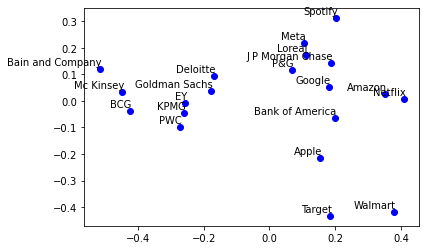

In [42]:
# MDS plot using the Euclidean distances calculated above.
x= X_mds[:,0]
y= X_mds[:,1]

for i in range(len(x)):
    plt.scatter(x[i],y[i],c='blue')
    plt.annotate(
        company_list[i],
        xy = (x[i], y[i]), xytext = (2, 2),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

This MDS plot is not 100% accurate as we are compressing a 20 dimensional representation into a 2-d plot. But, we can see that the consultant companies are all clustered together. Target and Walmart (Retailers) are together. All the tech companies are almost close to each other along with some Finance companies like Bank of America and JPMC. Python doesn't know these categories but it is interesting that based on the topics distribution these companies have been automatically clustered together. 